# Import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

# encoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Train

## Data Preprocessing

### Load Data

In [4]:
# load data
df_train = pd.read_csv('Data Train.csv')

In [5]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


### Data Cleaning

In [6]:
df_train.shape

(4250, 20)

In [7]:
# melihat missing value dan duplicate value

datasets = [df_train]
titles = ['data_train']

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,data_train,"state, account_length, area_code, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls, churn",4250,20,0,0,


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
for col in df_train.columns:
  print(col)
  print(df_train[col].unique())
  print('type data:', df_train[col].dtype)
  print('\n')

state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
type data: object


account_length
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  

Mengubah type data pada kolom **'international_plan', 'voice_mail_plan', dan 'churn'** menjadi int

In [10]:
df_train['international_plan'] = df_train['international_plan'].replace({'no': 0, 'yes': 1})
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'no': 0, 'yes': 1})
df_train['churn'] = df_train['churn'].replace({'no': 0, 'yes': 1})

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [12]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


### Exploratory Data Analysis (EDA)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

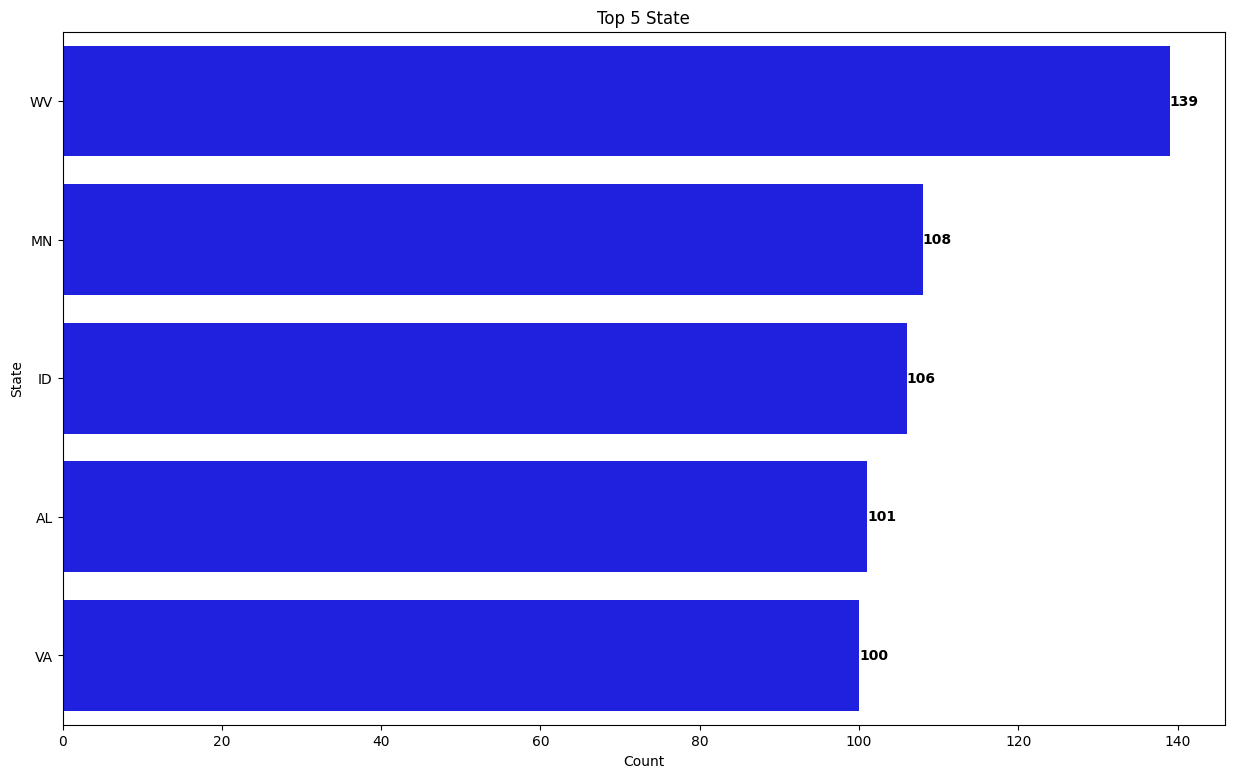

In [14]:
# bar chart berdasarkan state

# menghitung frekuensi kolom 'state'
state_counts = df_train['state'].value_counts()

# memilih 5 data teratas
top_5_state = state_counts.head(5)

# Membuat bar chart
fig = plt.figure(figsize=(15, 9))
ax = sns.barplot(y=top_5_state.index, x=top_5_state.values, order=top_5_state.index, color="Blue")
plt.title("Top 5 State")
plt.xlabel("Count")
plt.ylabel("State")

# menambahkan jumlah label di atas setiap bar
for i, count in enumerate(top_5_state.values):
    plt.text(count, i, f'{count}', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.show()

In [15]:
# fungsi visualisasi pie chart
fig_pie = plt.figure(figsize=(12, 5))

def vis_cat(cat_column, title_count, xy_label):
  ax = fig_pie.add_axes([0,0,1.5,1])
  df_train[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, figsize=(12, 5))
  plt.xlabel(xy_label)
  plt.ylabel('')

  plt.savefig('fig.png', bbox_inches='tight')

<Figure size 1200x500 with 0 Axes>

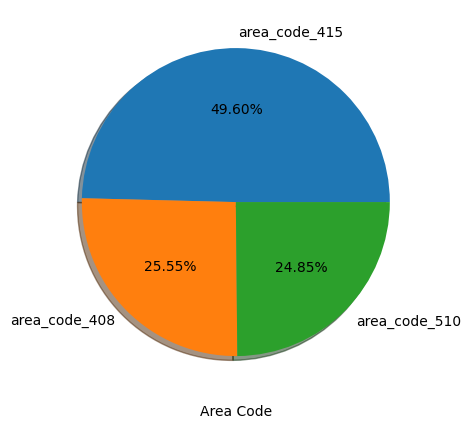

In [16]:
# pesebaran data berdasarkan area_code
col = 'area_code'
title_c = 'Distribution of Area Code'
label = 'Area Code'

vis_cat(col, title_c, label)

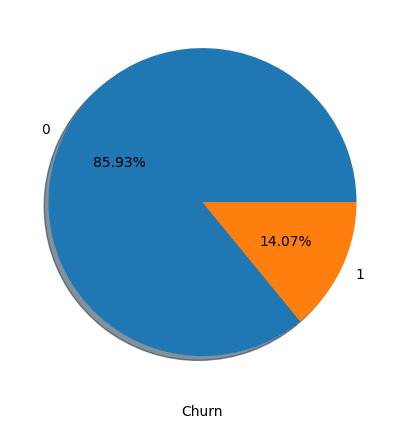

In [17]:
# pesebaran data berdasarkan churn
col = 'churn'
title_c = 'Distribution of Churn'
label = 'Churn'

vis_cat(col, title_c, label)

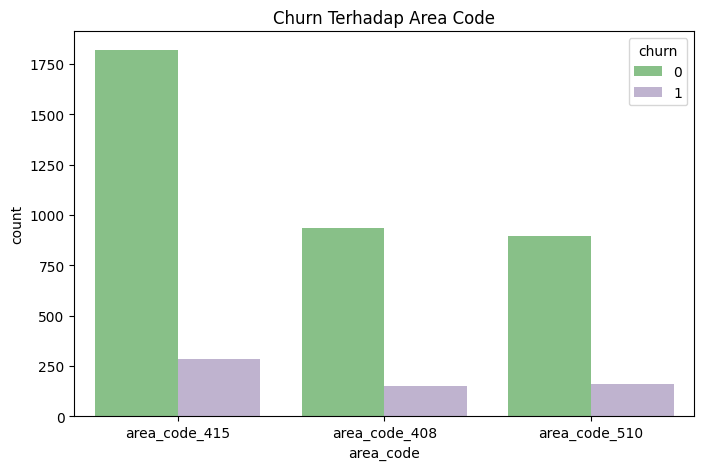

In [18]:
# Pesebaran data berdasarkan churn terhadap area_code
fig_bar = plt.subplots(figsize=(8, 5))
sns.countplot(x='area_code', hue = 'churn', data = df_train, palette='Accent')
plt.title("Churn Terhadap Area Code")
plt.show()

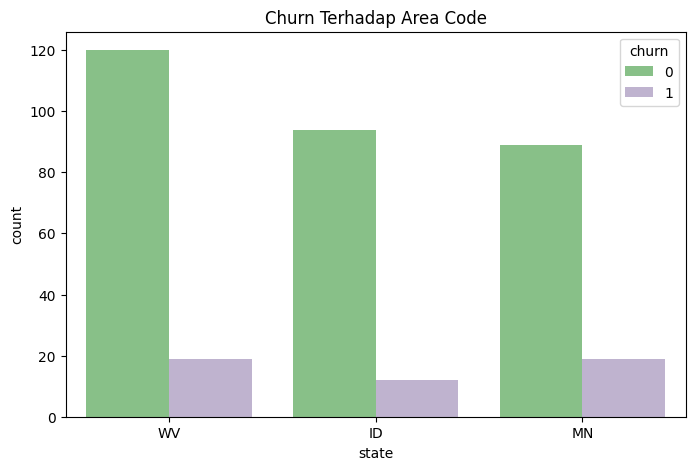

In [19]:
# Pesebaran data berdasarkan churn terhadap 3 terbesar state (WV, MN, ID)
fig_bar = plt.subplots(figsize=(8, 5))
sns.countplot(x='state', hue='churn', data=df_train[df_train['state'].isin(['WV', 'MN', 'ID'])], palette='Accent')
plt.title("Churn Terhadap Area Code")
plt.show()


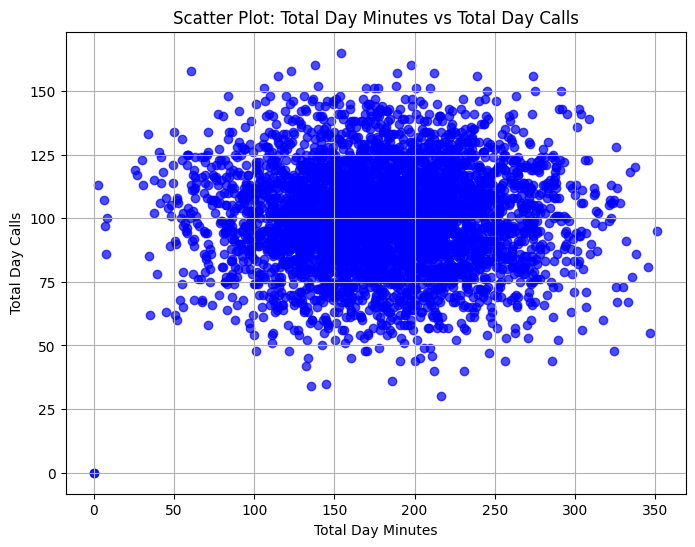

In [20]:
# melihat korelasi total_day_minutes dan total_day_calls
plt.figure(figsize=(8, 6))
plt.scatter(df_train['total_day_minutes'], df_train['total_day_calls'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Total Day Minutes vs Total Day Calls')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Calls')
plt.grid(True)
plt.show()

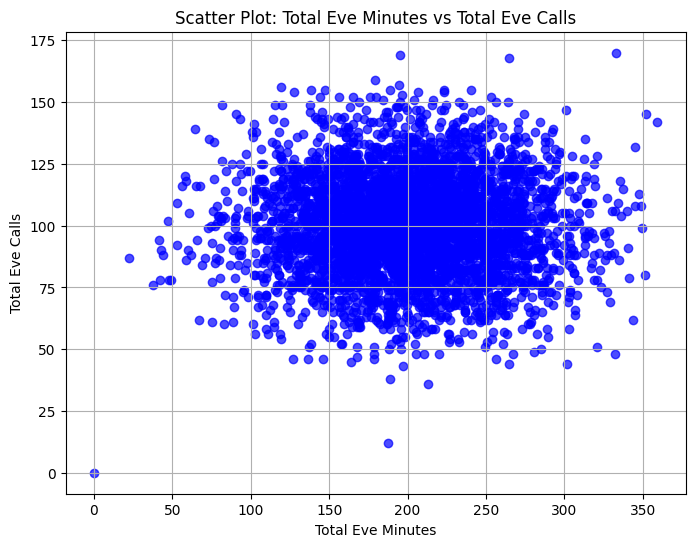

In [21]:
# melihat korelasi total_eve_minutes dan total_eve_calls
plt.figure(figsize=(8, 6))
plt.scatter(df_train['total_eve_minutes'], df_train['total_eve_calls'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Total Eve Minutes vs Total Eve Calls')
plt.xlabel('Total Eve Minutes')
plt.ylabel('Total Eve Calls')
plt.grid(True)
plt.show()

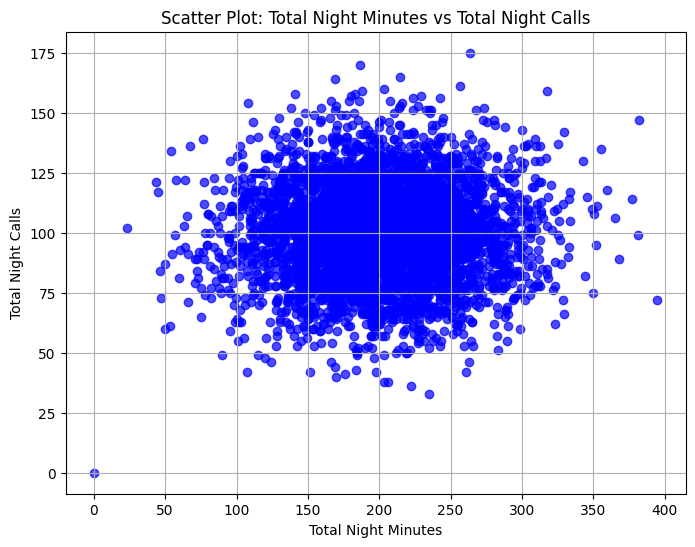

In [22]:
# melihat korelasi total_night_minutes dan total_night_calls
plt.figure(figsize=(8, 6))
plt.scatter(df_train['total_night_minutes'], df_train['total_night_calls'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Total Night Minutes vs Total Night Calls')
plt.xlabel('Total Night Minutes')
plt.ylabel('Total Night Calls')
plt.grid(True)
plt.show()

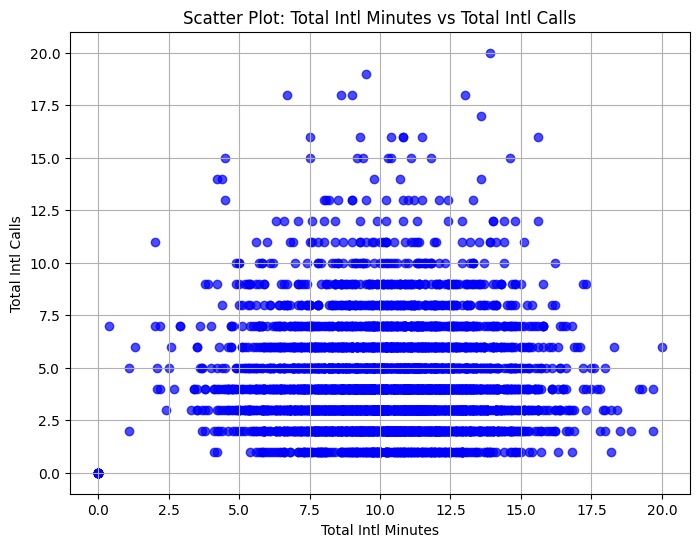

In [23]:
# melihat korelasi total_intl_minutes dan total_intl_calls
plt.figure(figsize=(8, 6))
plt.scatter(df_train['total_intl_minutes'], df_train['total_intl_calls'], color='blue', alpha=0.7)
plt.title('Scatter Plot: Total Intl Minutes vs Total Intl Calls')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Total Intl Calls')
plt.grid(True)
plt.show()

### Handling Outliers

<AxesSubplot: title={'center': 'Before Remove Outliers'}>

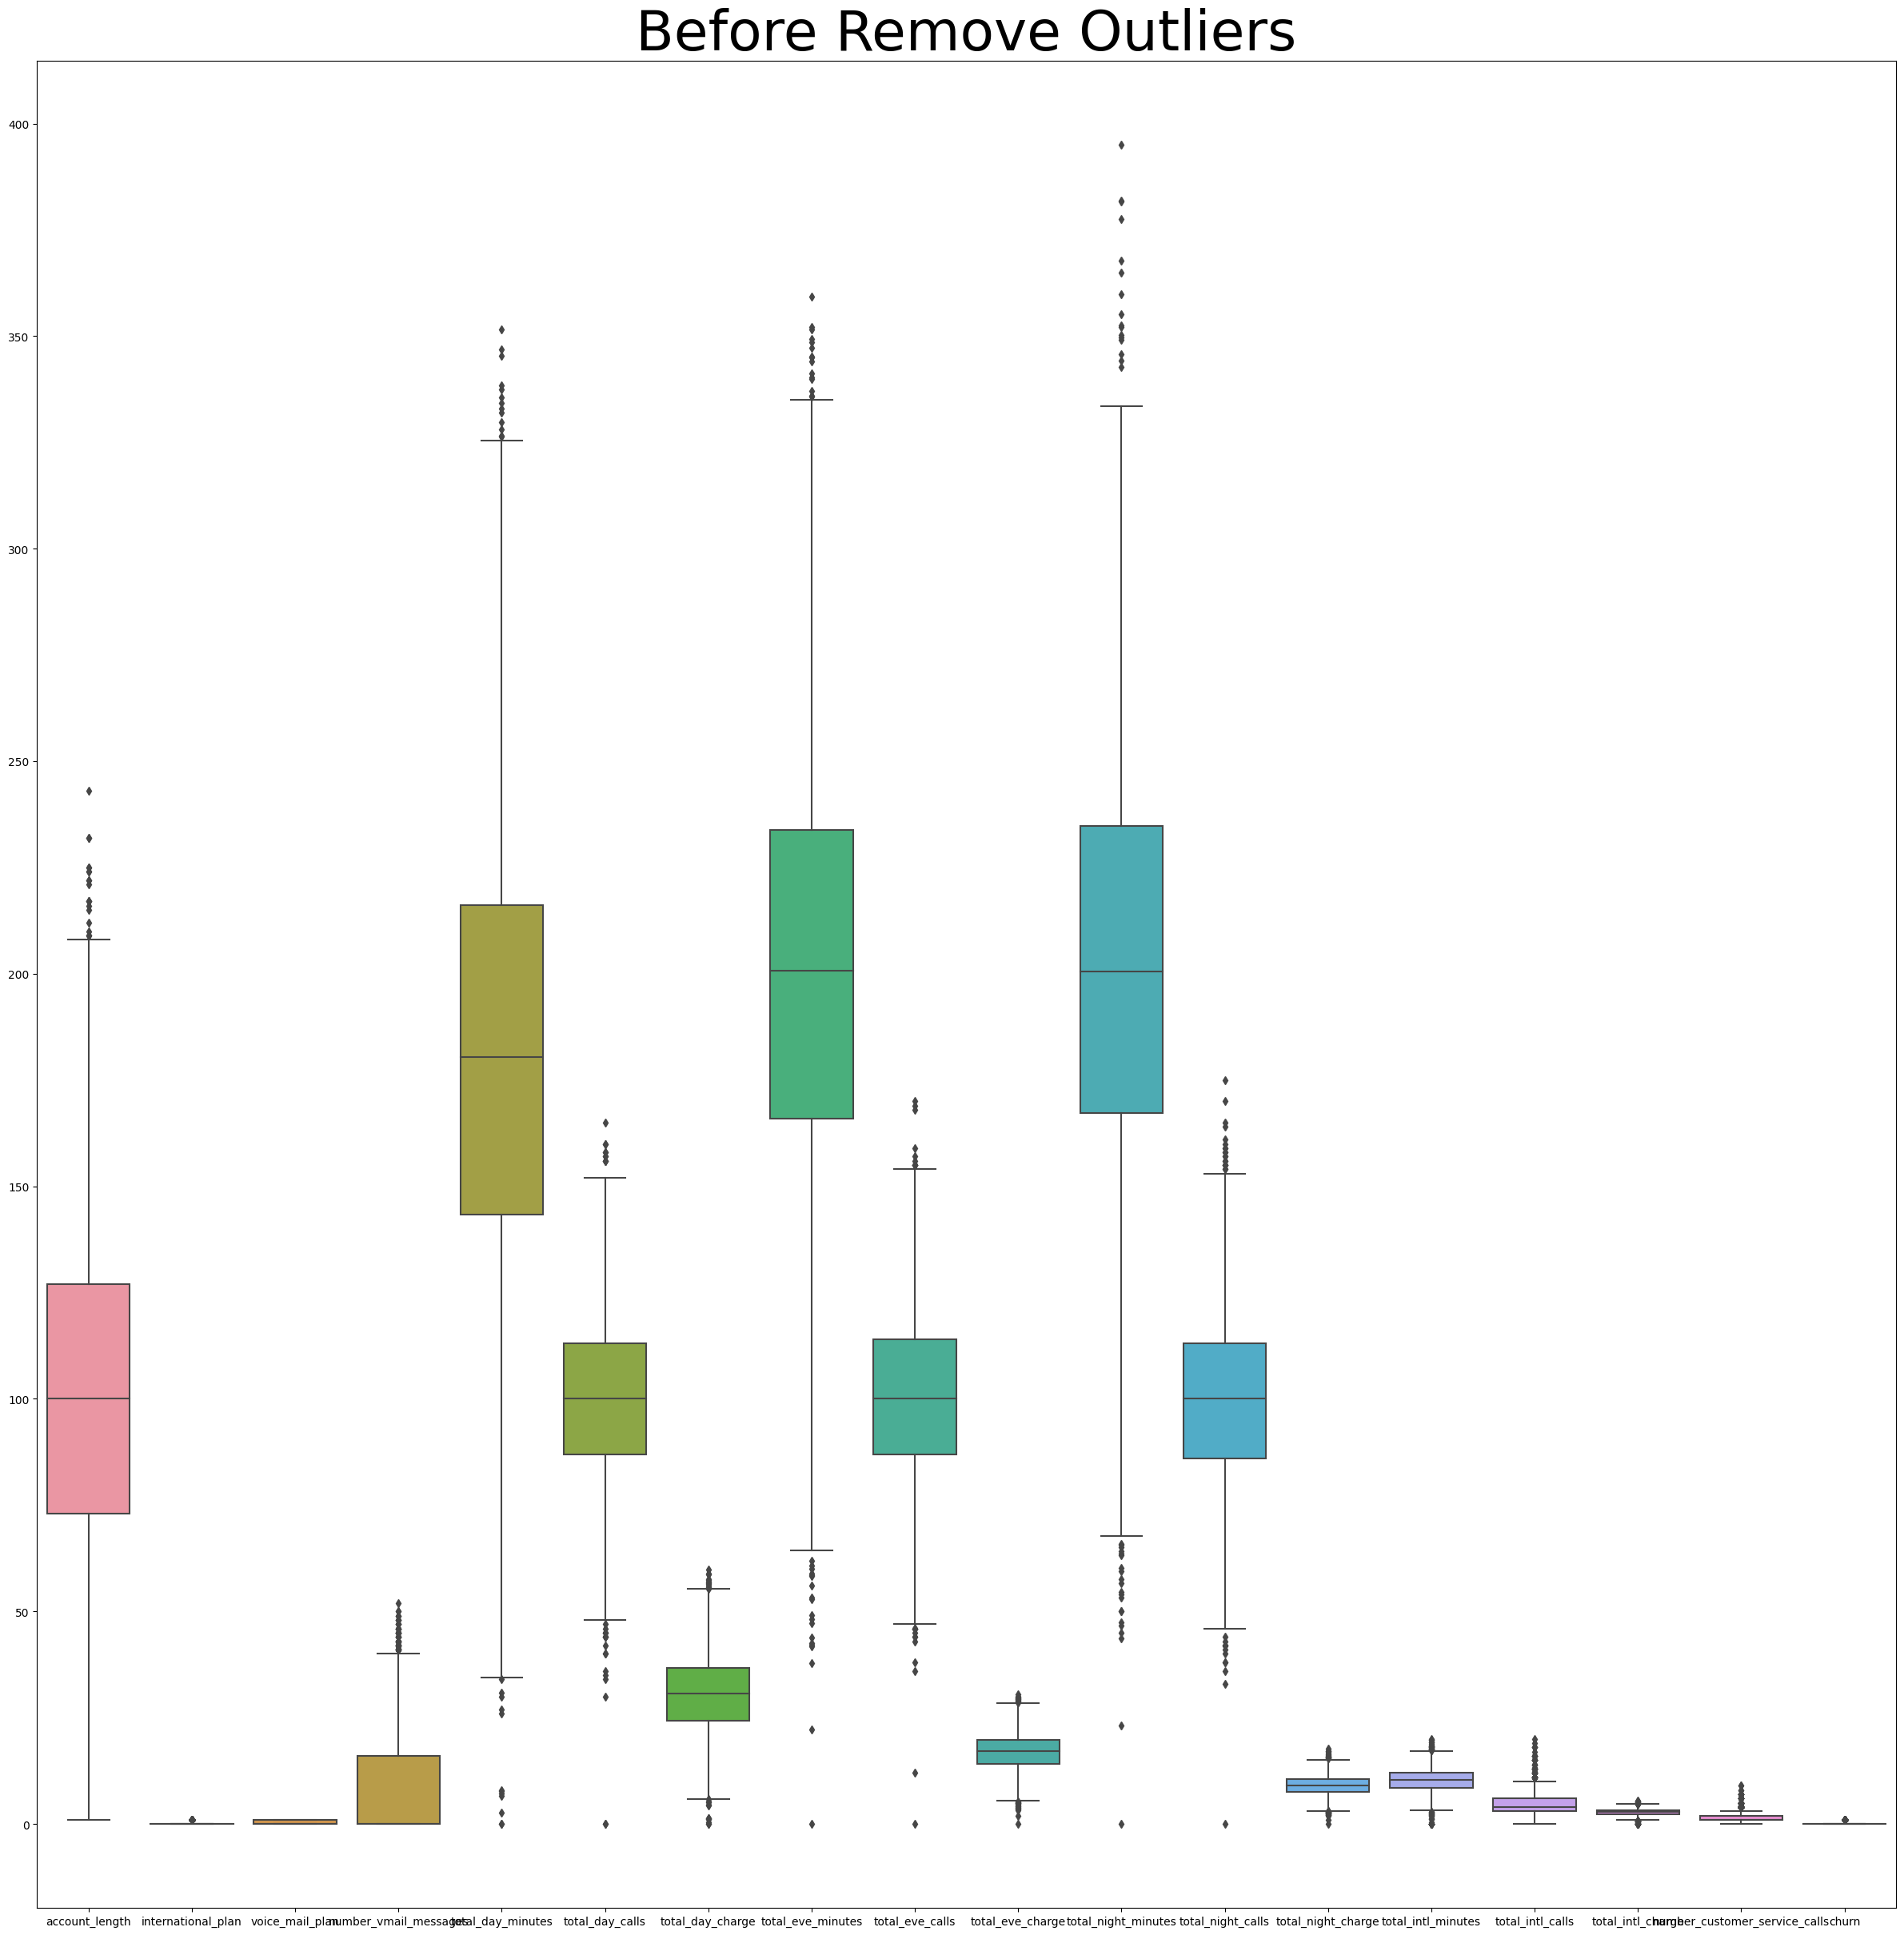

In [24]:
# melihat outliers
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Before Remove Outliers', fontsize=50)
sns.boxplot(data = df_train)

Berdasarkan boxplot diatas, terdapat outliers pada beberapa kolom. Diantaranya, yaitu **'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls'**.

Dalam kasus ini, akan dihapus outliers menggunakan teknik **Z-Score**.

In [25]:
# Z-Score
columns = ['total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls']

for i in columns:
    upper_limit = df_train[i].mean() + 3*df_train[i].std()
    lower_limit = df_train[i].mean() - 3*df_train[i].std()

    df_train[i] = np.where(
        df_train[i]>upper_limit,
        upper_limit,
        np.where(
            df_train[i]<lower_limit,
            lower_limit,
            df_train[i]
        )
    )

<AxesSubplot: title={'center': 'After Remove Outliers'}>

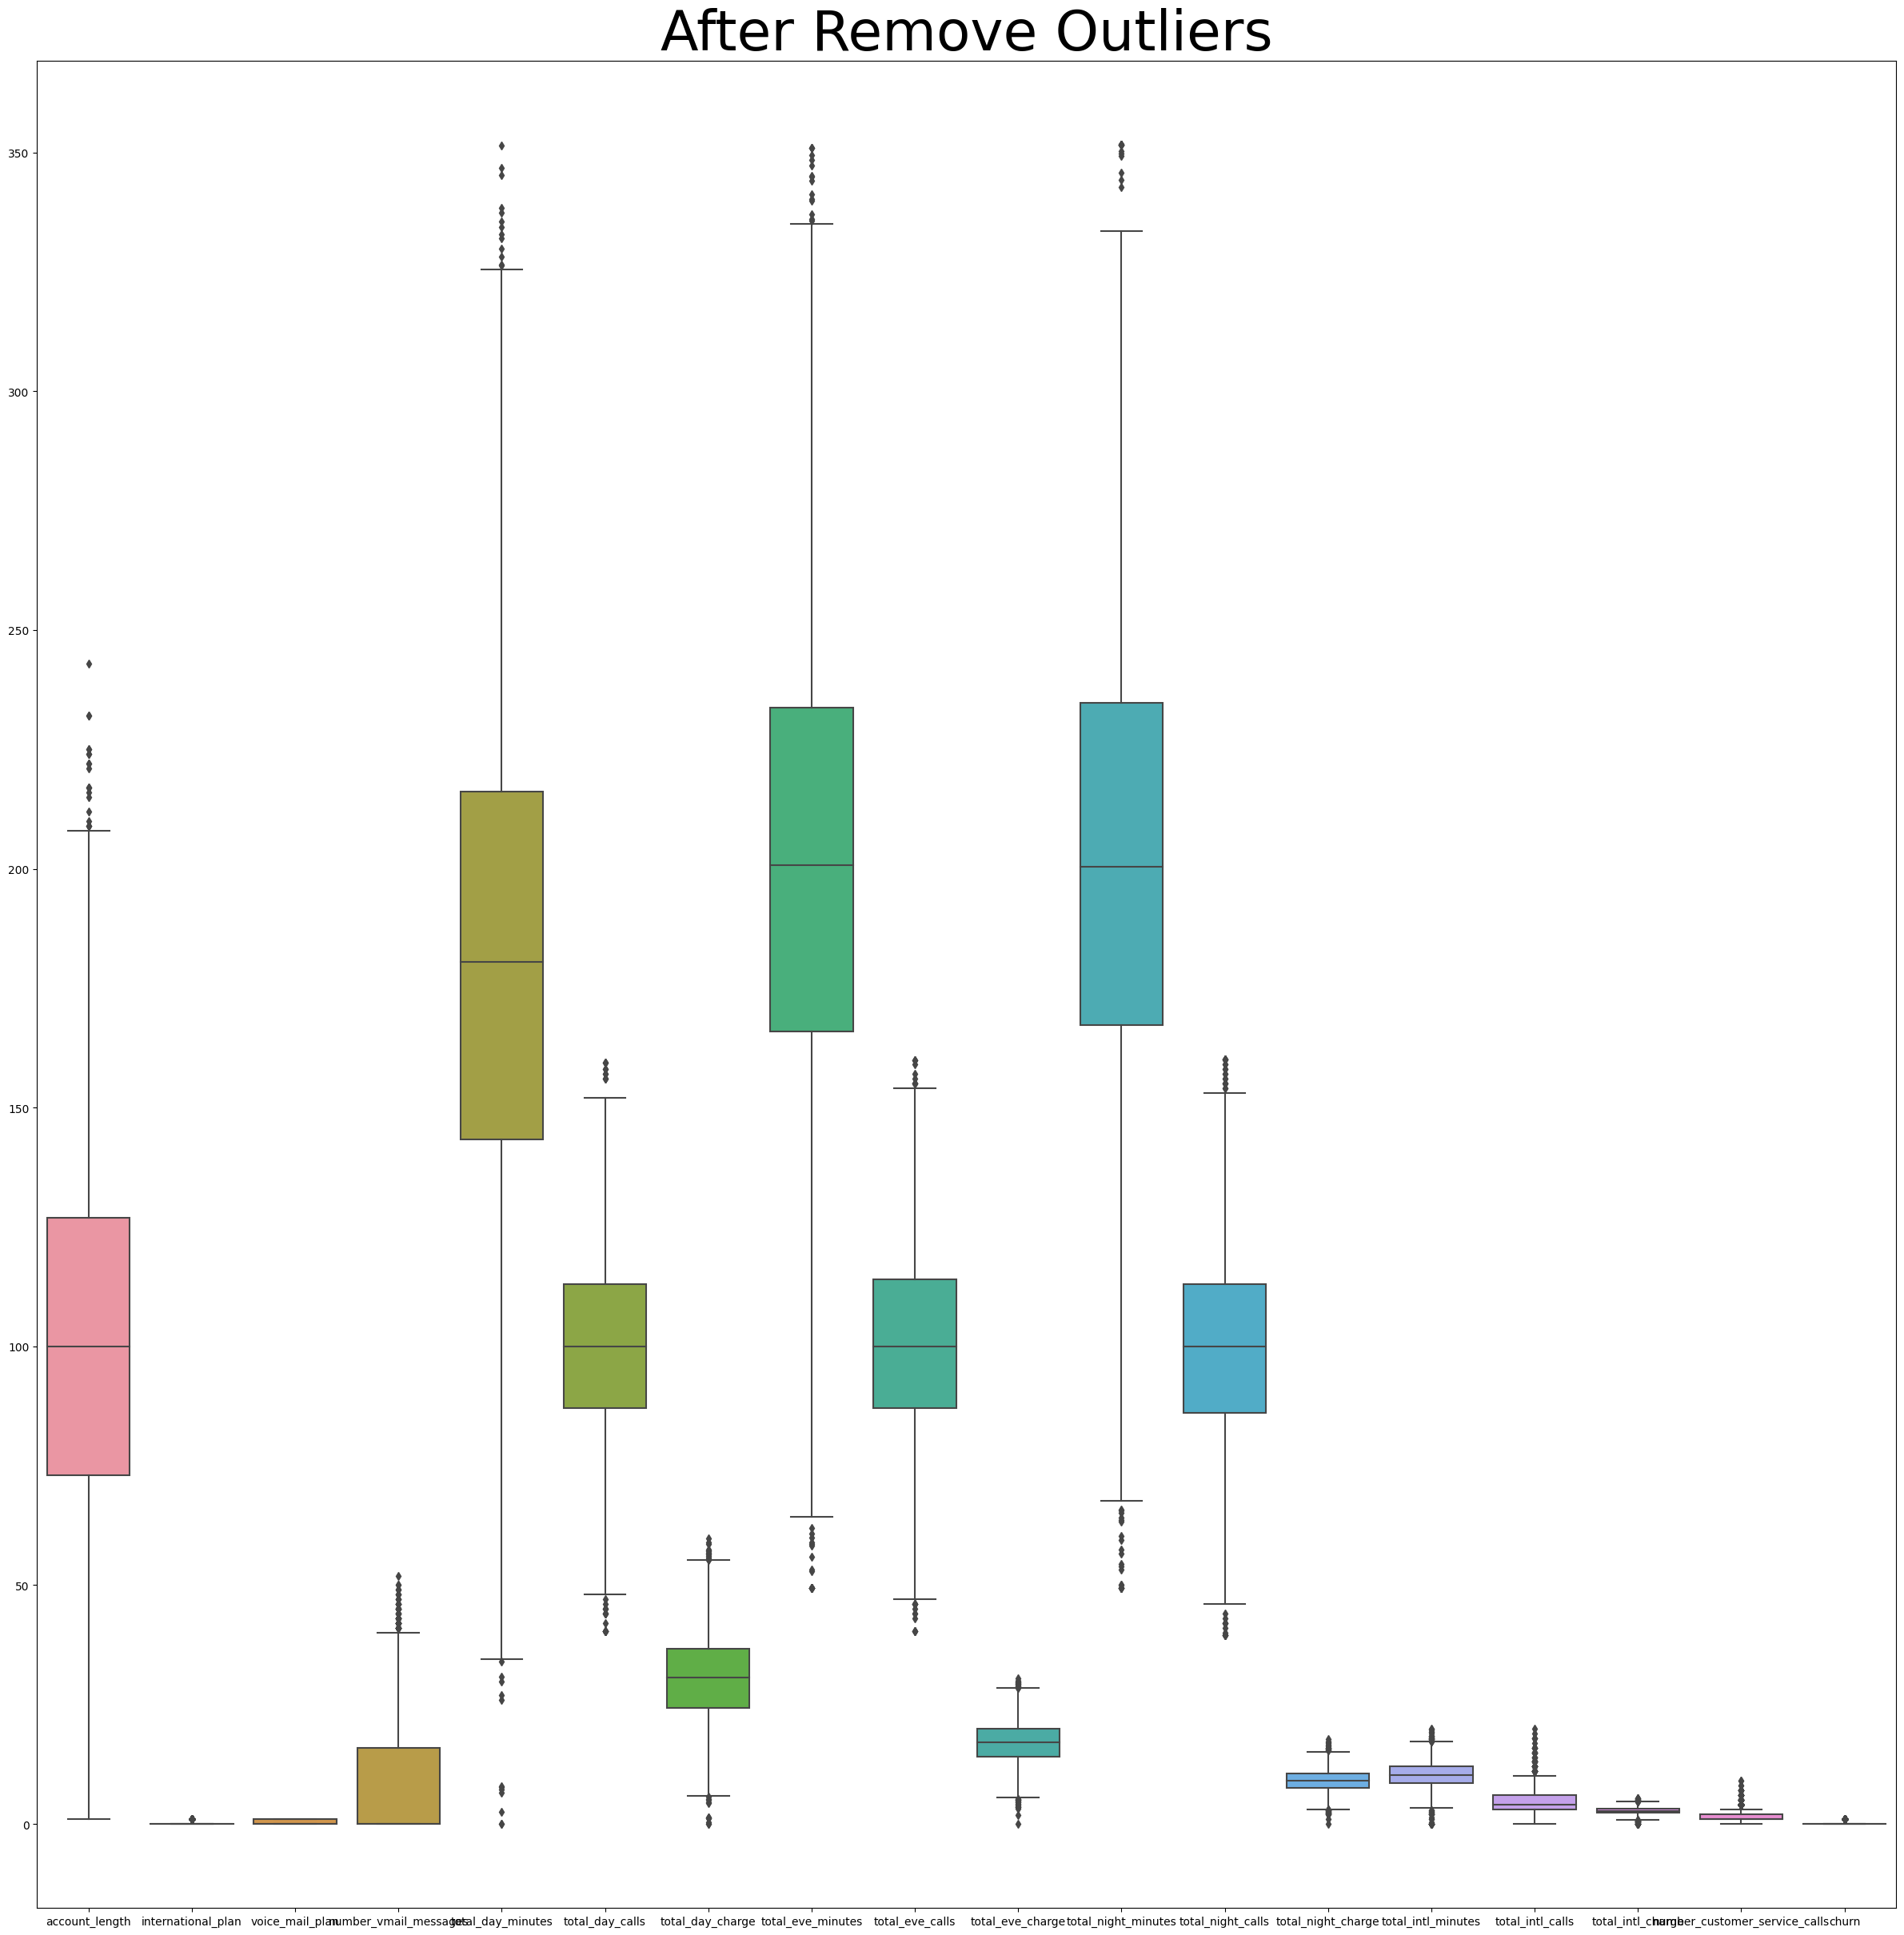

In [26]:
fig, ax = plt.subplots(figsize=(30,30))
plt.title('After Remove Outliers', fontsize=50)
sns.boxplot(data = df_train)

### Data Encoding

In [27]:
for col in df_train.columns:
  print(col)
  print(df_train[col].unique())
  print('type data:', df_train[col].dtype)
  print('\n')

state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
type data: object


account_length
[107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189 176 156  37  27 134 243  42  

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   float64
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   float64
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [29]:
# melakukan label encoder (ordinal) pada kolom state
le = LabelEncoder()
df_train['state'] = le.fit_transform(df_train['state'])

In [30]:
# melakukan one hot encoder (nominal) pada kolom area_code
df_train = pd.get_dummies(df_train)
df_train

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,35,107,0,1,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0,0,1,0
1,31,137,0,0,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0,0,1,0
2,35,84,1,0,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2,0,1,0,0
3,36,75,1,0,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3,0,0,1,0
4,19,121,0,1,24,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7,2.03,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,0,0,0,188.3,70.0,32.01,243.8,88.0,20.72,213.7,79.0,9.62,10.3,6,2.78,0,0,0,1,0
4246,49,73,0,0,0,177.9,89.0,30.24,131.2,82.0,11.15,186.2,89.0,8.38,11.5,6,3.11,3,0,1,0,0
4247,27,75,0,0,0,170.7,101.0,29.02,193.1,126.0,16.41,129.1,104.0,5.81,6.9,7,1.86,1,0,1,0,0
4248,11,50,0,1,40,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5,2.67,2,0,1,0,0


### Handling Imbalance Data (Variabel Target)

In [31]:
df_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,35,107,0,1,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1,0,0,1,0
1,31,137,0,0,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0,0,0,1,0
2,35,84,1,0,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2,0,1,0,0
3,36,75,1,0,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3,0,0,1,0
4,19,121,0,1,24,218.2,88.0,37.09,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7,2.03,3,0,0,0,1


In [32]:
# memisahkan variable input dan target
X = df_train.drop(['churn'], axis=1)
y = df_train['churn']

In [33]:
y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

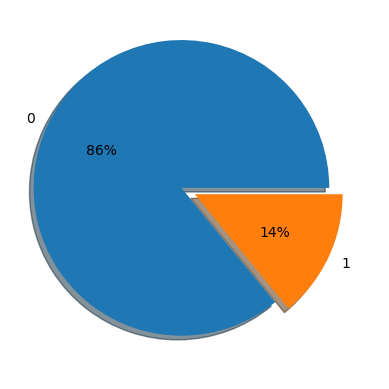

0    3652
1     598
Name: churn, dtype: int64


In [34]:
churn_count = df_train['churn'].value_counts()
labels = ['0','1']
churn = y.value_counts()
myexplode = [0.1, 0]
plt.pie(churn, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

Dilihat dari pie chart bahwa terjadi ketidakseimbangan variable target atau churn sehingga diperlukan penyeimbangan. Disini digunakan teknik SMOTE ENN (Hybrid Sampling) untuk menyeimbangkannya. Hybrid Sampling adalah gabungan dari Oversampling dan Undersampling.

In [35]:
X, y = SMOTEENN().fit_resample(X,y)

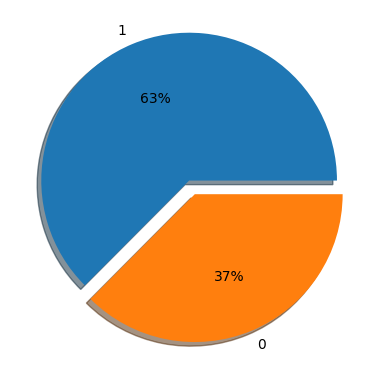

1    3534
0    2117
Name: churn, dtype: int64


In [36]:
churn_count = df_train['churn'].value_counts()
labels = ['1','0']
churn = y.value_counts()
myexplode = [0.1, 0]
plt.pie(churn, labels = labels, explode = myexplode, shadow = True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [37]:
# menggabungkan data X dan y kembali
df_train = pd.concat([X, y], axis=1)
df_train

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,churn
0,35,107,0,1,26,161.600000,123.000000,27.470000,195.500000,103.000000,16.620000,254.400000,103.000000,11.450000,13.700000,3,3.700000,1,0,1,0,0
1,31,137,0,0,0,243.400000,114.000000,41.380000,121.200000,110.000000,10.300000,162.600000,104.000000,7.320000,12.200000,5,3.290000,0,0,1,0,0
2,35,84,1,0,0,299.400000,71.000000,50.900000,61.900000,88.000000,5.260000,196.900000,89.000000,8.860000,6.600000,7,1.780000,2,1,0,0,0
3,24,147,1,0,0,157.000000,79.000000,26.690000,103.100000,94.000000,8.760000,211.800000,96.000000,9.530000,7.100000,6,1.920000,0,0,1,0,0
4,39,74,0,0,0,187.700000,127.000000,31.910000,163.400000,148.000000,13.890000,196.000000,94.000000,8.820000,9.100000,5,2.460000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,43,121,0,0,0,270.509421,107.091417,45.990056,233.274808,112.459873,19.831996,247.895535,114.731332,11.158890,9.936288,6,2.686343,1,0,0,0,1
5647,27,117,0,0,0,165.985533,76.751281,28.217934,176.448168,91.212455,14.999791,175.124398,76.782419,7.880883,11.017107,2,2.976583,4,1,0,0,1
5648,34,105,1,0,0,185.229606,77.273998,31.491791,277.792497,93.503494,23.612560,192.902648,93.484001,8.680960,12.564950,4,3.395855,1,0,1,0,1
5649,48,58,1,0,0,156.444804,93.318763,26.597649,230.722763,117.703093,19.608105,119.185072,95.659381,5.362988,12.283423,3,3.317887,1,0,0,0,1


### Feature Selection

Untuk feature selection, digunakan teknik SelectKBest.

In [38]:
# memisahkan variable input dan target
X = df_train.drop(['churn'], axis=1)
y = df_train['churn']

In [39]:
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by='Score',ascending=False)

The features that correlate well with target feature:



,Features,Score
5,total_day_minutes,7371.575268
4,number_vmail_messages,5556.456525
7,total_day_charge,1253.050157
8,total_eve_minutes,798.868996
3,voice_mail_plan,437.190942
11,total_night_minutes,262.749942
18,area_code_area_code_408,223.730148
19,area_code_area_code_415,204.260879
20,area_code_area_code_510,199.450345
17,number_customer_service_calls,178.692383


Melihat korelasi feature diatas terhadap target features, maka akan dipilih feature yang memiliki skor diatas 100. Feature yang dipilih itu digunakan untuk melihat sekali lagi korelasi feature dengan feature lainnya.

In [40]:
df_model = df_train[['total_day_minutes', 'number_vmail_messages', 'total_day_charge', 'total_eve_minutes', 
                     'voice_mail_plan', 'total_night_minutes', 'area_code_area_code_408', 'account_length', 
                     'area_code_area_code_415', 'area_code_area_code_510', 'number_customer_service_calls', 
                     'total_intl_calls', 'churn']]

### Correlation Matrix

In [41]:
df_model

,total_day_minutes,number_vmail_messages,total_day_charge,total_eve_minutes,voice_mail_plan,total_night_minutes,area_code_area_code_408,account_length,area_code_area_code_415,area_code_area_code_510,number_customer_service_calls,total_intl_calls,churn
0,161.600000,26,27.470000,195.500000,1,254.400000,0,107,1,0,1,3,0
1,243.400000,0,41.380000,121.200000,0,162.600000,0,137,1,0,0,5,0
2,299.400000,0,50.900000,61.900000,0,196.900000,1,84,0,0,2,7,0
3,157.000000,0,26.690000,103.100000,0,211.800000,0,147,1,0,0,6,0
4,187.700000,0,31.910000,163.400000,0,196.000000,0,74,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5646,270.509421,0,45.990056,233.274808,0,247.895535,0,121,0,0,1,6,1
5647,165.985533,0,28.217934,176.448168,0,175.124398,1,117,0,0,4,2,1
5648,185.229606,0,31.491791,277.792497,0,192.902648,0,105,1,0,1,4,1
5649,156.444804,0,26.597649,230.722763,0,119.185072,0,58,0,0,1,3,1


In [42]:
df_model.corr()

,total_day_minutes,number_vmail_messages,total_day_charge,total_eve_minutes,voice_mail_plan,total_night_minutes,area_code_area_code_408,account_length,area_code_area_code_415,area_code_area_code_510,number_customer_service_calls,total_intl_calls,churn
total_day_minutes,1.000000,-0.164746,1.000000,0.132029,-0.143590,0.106368,-0.036431,-0.010264,-0.047914,-0.074772,-0.284130,0.047672,0.258227
number_vmail_messages,-0.164746,1.000000,-0.164749,-0.077123,0.890062,-0.052112,0.042699,0.008925,0.030581,0.046432,0.046186,0.060908,-0.199933
total_day_charge,1.000000,-0.164749,1.000000,0.132024,-0.143590,0.106361,-0.036427,-0.010265,-0.047911,-0.074766,-0.284130,0.047669,0.258215
total_eve_minutes,0.132029,-0.077123,0.132024,1.000000,-0.063816,-0.008421,-0.011130,-0.012197,-0.071405,-0.008424,-0.140878,0.047669,0.108362
voice_mail_plan,-0.143590,0.890062,-0.143590,-0.063816,1.000000,-0.025491,0.063001,0.000335,0.077767,0.077821,-0.004644,0.064338,-0.300827
total_night_minutes,0.106368,-0.052112,0.106361,-0.008421,-0.025491,1.000000,-0.038889,-0.026365,0.010708,-0.024164,-0.052694,-0.026515,0.064014
area_code_area_code_408,-0.036431,0.042699,-0.036427,-0.011130,0.063001,-0.038889,1.000000,0.024261,-0.311535,-0.180724,-0.030356,0.053082,-0.215985
account_length,-0.010264,0.008925,-0.010265,-0.012197,0.000335,-0.026365,0.024261,1.000000,0.007724,-0.038464,0.038619,-0.000270,0.036272
area_code_area_code_415,-0.047914,0.030581,-0.047911,-0.071405,0.077767,0.010708,-0.311535,0.007724,1.000000,-0.315817,-0.045495,0.039104,-0.236272
area_code_area_code_510,-0.074772,0.046432,-0.074766,-0.008424,0.077821,-0.024164,-0.180724,-0.038464,-0.315817,1.000000,0.013415,0.015726,-0.204355


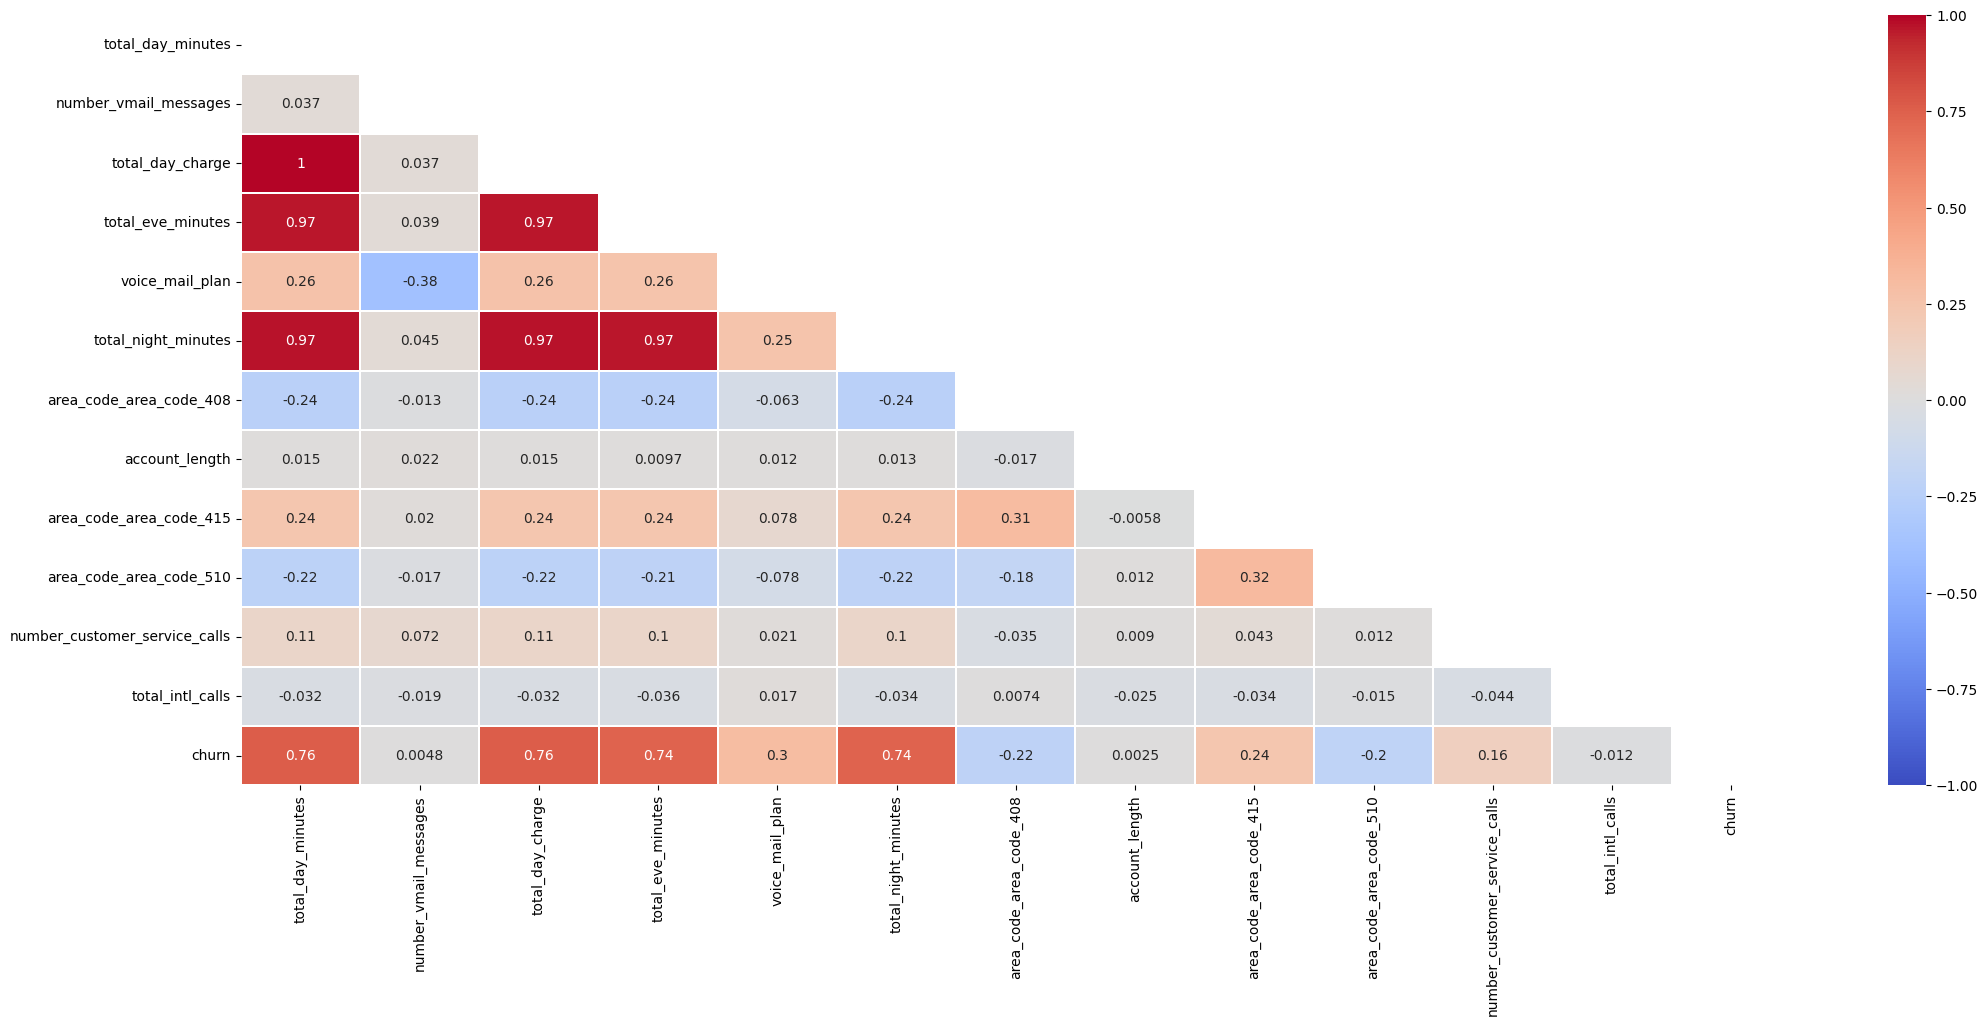

In [43]:
plt.figure(figsize=(25, 10))
corr = df_model.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Korelasi yang bernilai 1 (merah) menunjukkan hubungan linear positif sempurna, sedangkan yang bernilai -1 (biru) menunjukkan hubungan linear negatif sempurna. 
Korelasiyang bernilai   (putih)0 menunjukkan tidak adanya hubungan linear antara variabel tersebut 
Semakin mendekati 1 atau -1, semakin kuat hubungan linear antara variabel.

Berdasarkan heatmap diatas, akan dihapus feature yang mendekati nilai 0 (putih) yang dimana jika suatu feature lebih dominan berwarna putih terhadap feature lainnya, maka feature tersebut akan dihapus.

Feature yang tidak dihapus akan digunakan untuk feature dalam pemodelan machine learning.

In [44]:
df_model = df_model.drop(['number_vmail_messages', 'account_length', 'total_intl_calls'], axis=1)

In [45]:
df_model

,total_day_minutes,total_day_charge,total_eve_minutes,voice_mail_plan,total_night_minutes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,number_customer_service_calls,churn
0,161.600000,27.470000,195.500000,1,254.400000,0,1,0,1,0
1,243.400000,41.380000,121.200000,0,162.600000,0,1,0,0,0
2,299.400000,50.900000,61.900000,0,196.900000,1,0,0,2,0
3,157.000000,26.690000,103.100000,0,211.800000,0,1,0,0,0
4,187.700000,31.910000,163.400000,0,196.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5646,270.509421,45.990056,233.274808,0,247.895535,0,0,0,1,1
5647,165.985533,28.217934,176.448168,0,175.124398,1,0,0,4,1
5648,185.229606,31.491791,277.792497,0,192.902648,0,1,0,1,1
5649,156.444804,26.597649,230.722763,0,119.185072,0,0,0,1,1


In [46]:
df_model.columns

Index(['total_day_minutes', 'total_day_charge', 'total_eve_minutes',
       'voice_mail_plan', 'total_night_minutes', 'area_code_area_code_408',
       'area_code_area_code_415', 'area_code_area_code_510',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Baseline Model

In [47]:
# memisahkan variable input dan target
X = df_model.drop(['churn'], axis=1)
y = df_model['churn']

In [48]:
# split train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [49]:
# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [50]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
             RandomForestClassifier,
             GradientBoostingClassifier,
             ExtraTreesClassifier,
             XGBClassifier,
             CatBoostClassifier]

model_name = ['DecisionTreeClassifier',
              'LogisticRegression',
              'KNeighborsClassifier',
              'GaussianNB',
              'RandomForestClassifier',
              'GradientBoostingClassifier',
              'ExtraTreesClassifier',
              'XGBClassifier',
              'CatBoostClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
F1_Score = []
auc =[]

for idx, model_type in enumerate(all_model):
    #num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    F1_ScoreTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        F1_ScoreTemp.append(f1_score(y_test, y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))

        nfold += 1

    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    F1_Score.append(np.mean(F1_ScoreTemp))
    auc.append(np.mean(AucTemp))

Learning rate set to 0.019619
0:	learn: 0.6659652	total: 144ms	remaining: 2m 23s
1:	learn: 0.6408034	total: 147ms	remaining: 1m 13s
2:	learn: 0.6183842	total: 150ms	remaining: 50s
3:	learn: 0.6088173	total: 154ms	remaining: 38.2s
4:	learn: 0.5878891	total: 157ms	remaining: 31.2s
5:	learn: 0.5777515	total: 160ms	remaining: 26.5s
6:	learn: 0.5692307	total: 163ms	remaining: 23.2s
7:	learn: 0.5598012	total: 167ms	remaining: 20.7s
8:	learn: 0.5521716	total: 170ms	remaining: 18.7s
9:	learn: 0.5448597	total: 174ms	remaining: 17.2s
10:	learn: 0.5343633	total: 177ms	remaining: 15.9s
11:	learn: 0.5261589	total: 181ms	remaining: 14.9s
12:	learn: 0.5105474	total: 185ms	remaining: 14s
13:	learn: 0.5042276	total: 189ms	remaining: 13.3s
14:	learn: 0.4903521	total: 193ms	remaining: 12.7s
15:	learn: 0.4840791	total: 197ms	remaining: 12.1s
16:	learn: 0.4788479	total: 201ms	remaining: 11.6s
17:	learn: 0.4668099	total: 205ms	remaining: 11.2s
18:	learn: 0.4611070	total: 209ms	remaining: 10.8s
19:	learn: 0.

In [51]:
# compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['F1-Score'] = F1_Score
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test', ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,F1-Score,AUC,gap
6,ExtraTreesClassifier,1.000000,0.932577,0.962302,0.928688,0.945101,0.933872,0.067423
4,RandomForestClassifier,1.000000,0.926561,0.957288,0.923875,0.940185,0.927454,0.073439
7,XGBClassifier,0.997523,0.923198,0.951780,0.924157,0.937620,0.922870,0.074324
8,CatBoostClassifier,0.965537,0.921782,0.959833,0.913407,0.935895,0.924577,0.043755
0,DecisionTreeClassifier,1.000000,0.901785,0.917346,0.926421,0.921784,0.893534,0.098215
5,GradientBoostingClassifier,0.911697,0.893645,0.957124,0.868979,0.910805,0.901891,0.018052
2,KNeighborsClassifier,0.891302,0.837020,0.835677,0.920484,0.876006,0.809083,0.054282
1,LogisticRegression,0.814679,0.813838,0.858633,0.841255,0.849741,0.804668,0.000841
3,GaussianNB,0.783534,0.783755,0.806501,0.861067,0.832742,0.757886,0.000221


Dilihat dari table diatas, disimpulkan model terbaik adalah ExtraTreesClassifier. Dalam mengevaluasi performa, digunakan metrik AUC dengan skor 93,38%.

## Hyperparameter

In [52]:
model = ExtraTreesClassifier()

In [53]:
# create the random grid
params = {'n_estimators': [10,50,100],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth':[16,32, None],
          'min_samples_split': [2,4,6],
          'min_samples_leaf': [1,5,10],
          'max_features': ['sqrt', 'log2', None]}

In [54]:
etc_grid = GridSearchCV(model, params, cv=10, n_jobs=-1)

In [55]:
etc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [16, 32, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]})

In [56]:
# tampilkan parameter terbaik
print("Best Parameters:", etc_grid.best_params_)
print("Train Score:", etc_grid.best_score_)
print("Test Score:", etc_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, etc_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, etc_grid.predict(X_test), average='macro'))
print('F1-Score:', f1_score(y_test, etc_grid.predict(X_test), average='macro'))
print('AUC:', roc_auc_score(y_test, etc_grid.predict(X_test), average='macro'))
print('GAP:', etc_grid.best_score_ - etc_grid.score(X_test,y_test))

Best Parameters: {'criterion': 'entropy', 'max_depth': 32, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Score: 0.925040047666491
Test Score: 0.9389380530973451
Precision: 0.9349981256861327
Recall: 0.9345835799385409
F1-Score: 0.9347899721914399
AUC: 0.9345835799385409
GAP: -0.013898005430854177


Setelah dihyperparameter tuning, ternyata score AUC mengalami peningkatan dari 93,38% menjadi 93,45%.

In [57]:
# cek performa model di data test
y_pred_test_etc = etc_grid.predict(X_test)
print(classification_report(y_test,y_pred_test_etc))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       423
           1       0.95      0.95      0.95       707

    accuracy                           0.94      1130
   macro avg       0.93      0.93      0.93      1130
weighted avg       0.94      0.94      0.94      1130



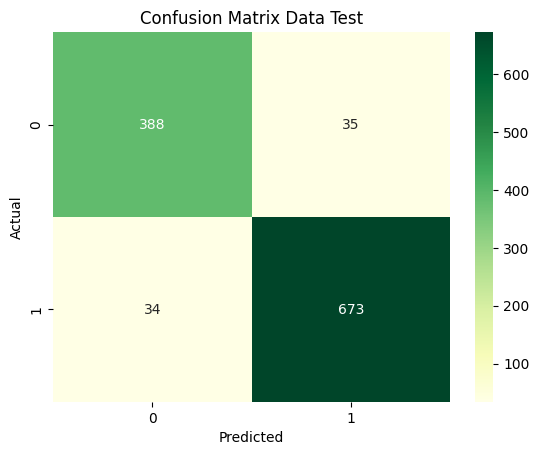

In [58]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test_etc)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
plt.xlabel('Predicted')
plt.ylabel('Actual')
a[0][0].set_title('Confusion Matrix Data Test');

# Data Test

## Data Preprocessing

### Load Data

In [79]:
df_test = pd.read_csv('Data Test.csv')

In [80]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


### Data Cleaning

In [81]:
# melihat missing value dan duplicate value

datasets = [df_test]
titles = ['data_test']

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='Greens_r')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,data_test,"id, state, account_length, area_code, international_plan, voice_mail_plan, number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge, total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes, total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge, number_customer_service_calls",750,20,0,0,


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

Mengubah type data pada kolom 'international_plan' dan 'voice_mail_plan' menjadi int

In [83]:
df_test['international_plan'] = df_train['international_plan'].replace({'no': 0, 'yes': 1})
df_test['voice_mail_plan'] = df_train['voice_mail_plan'].replace({'no': 0, 'yes': 1})

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    int64  
 5   voice_mail_plan                750 non-null    int64  
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### Handling Outliers

<AxesSubplot: title={'center': 'Before Remove Outliers'}>

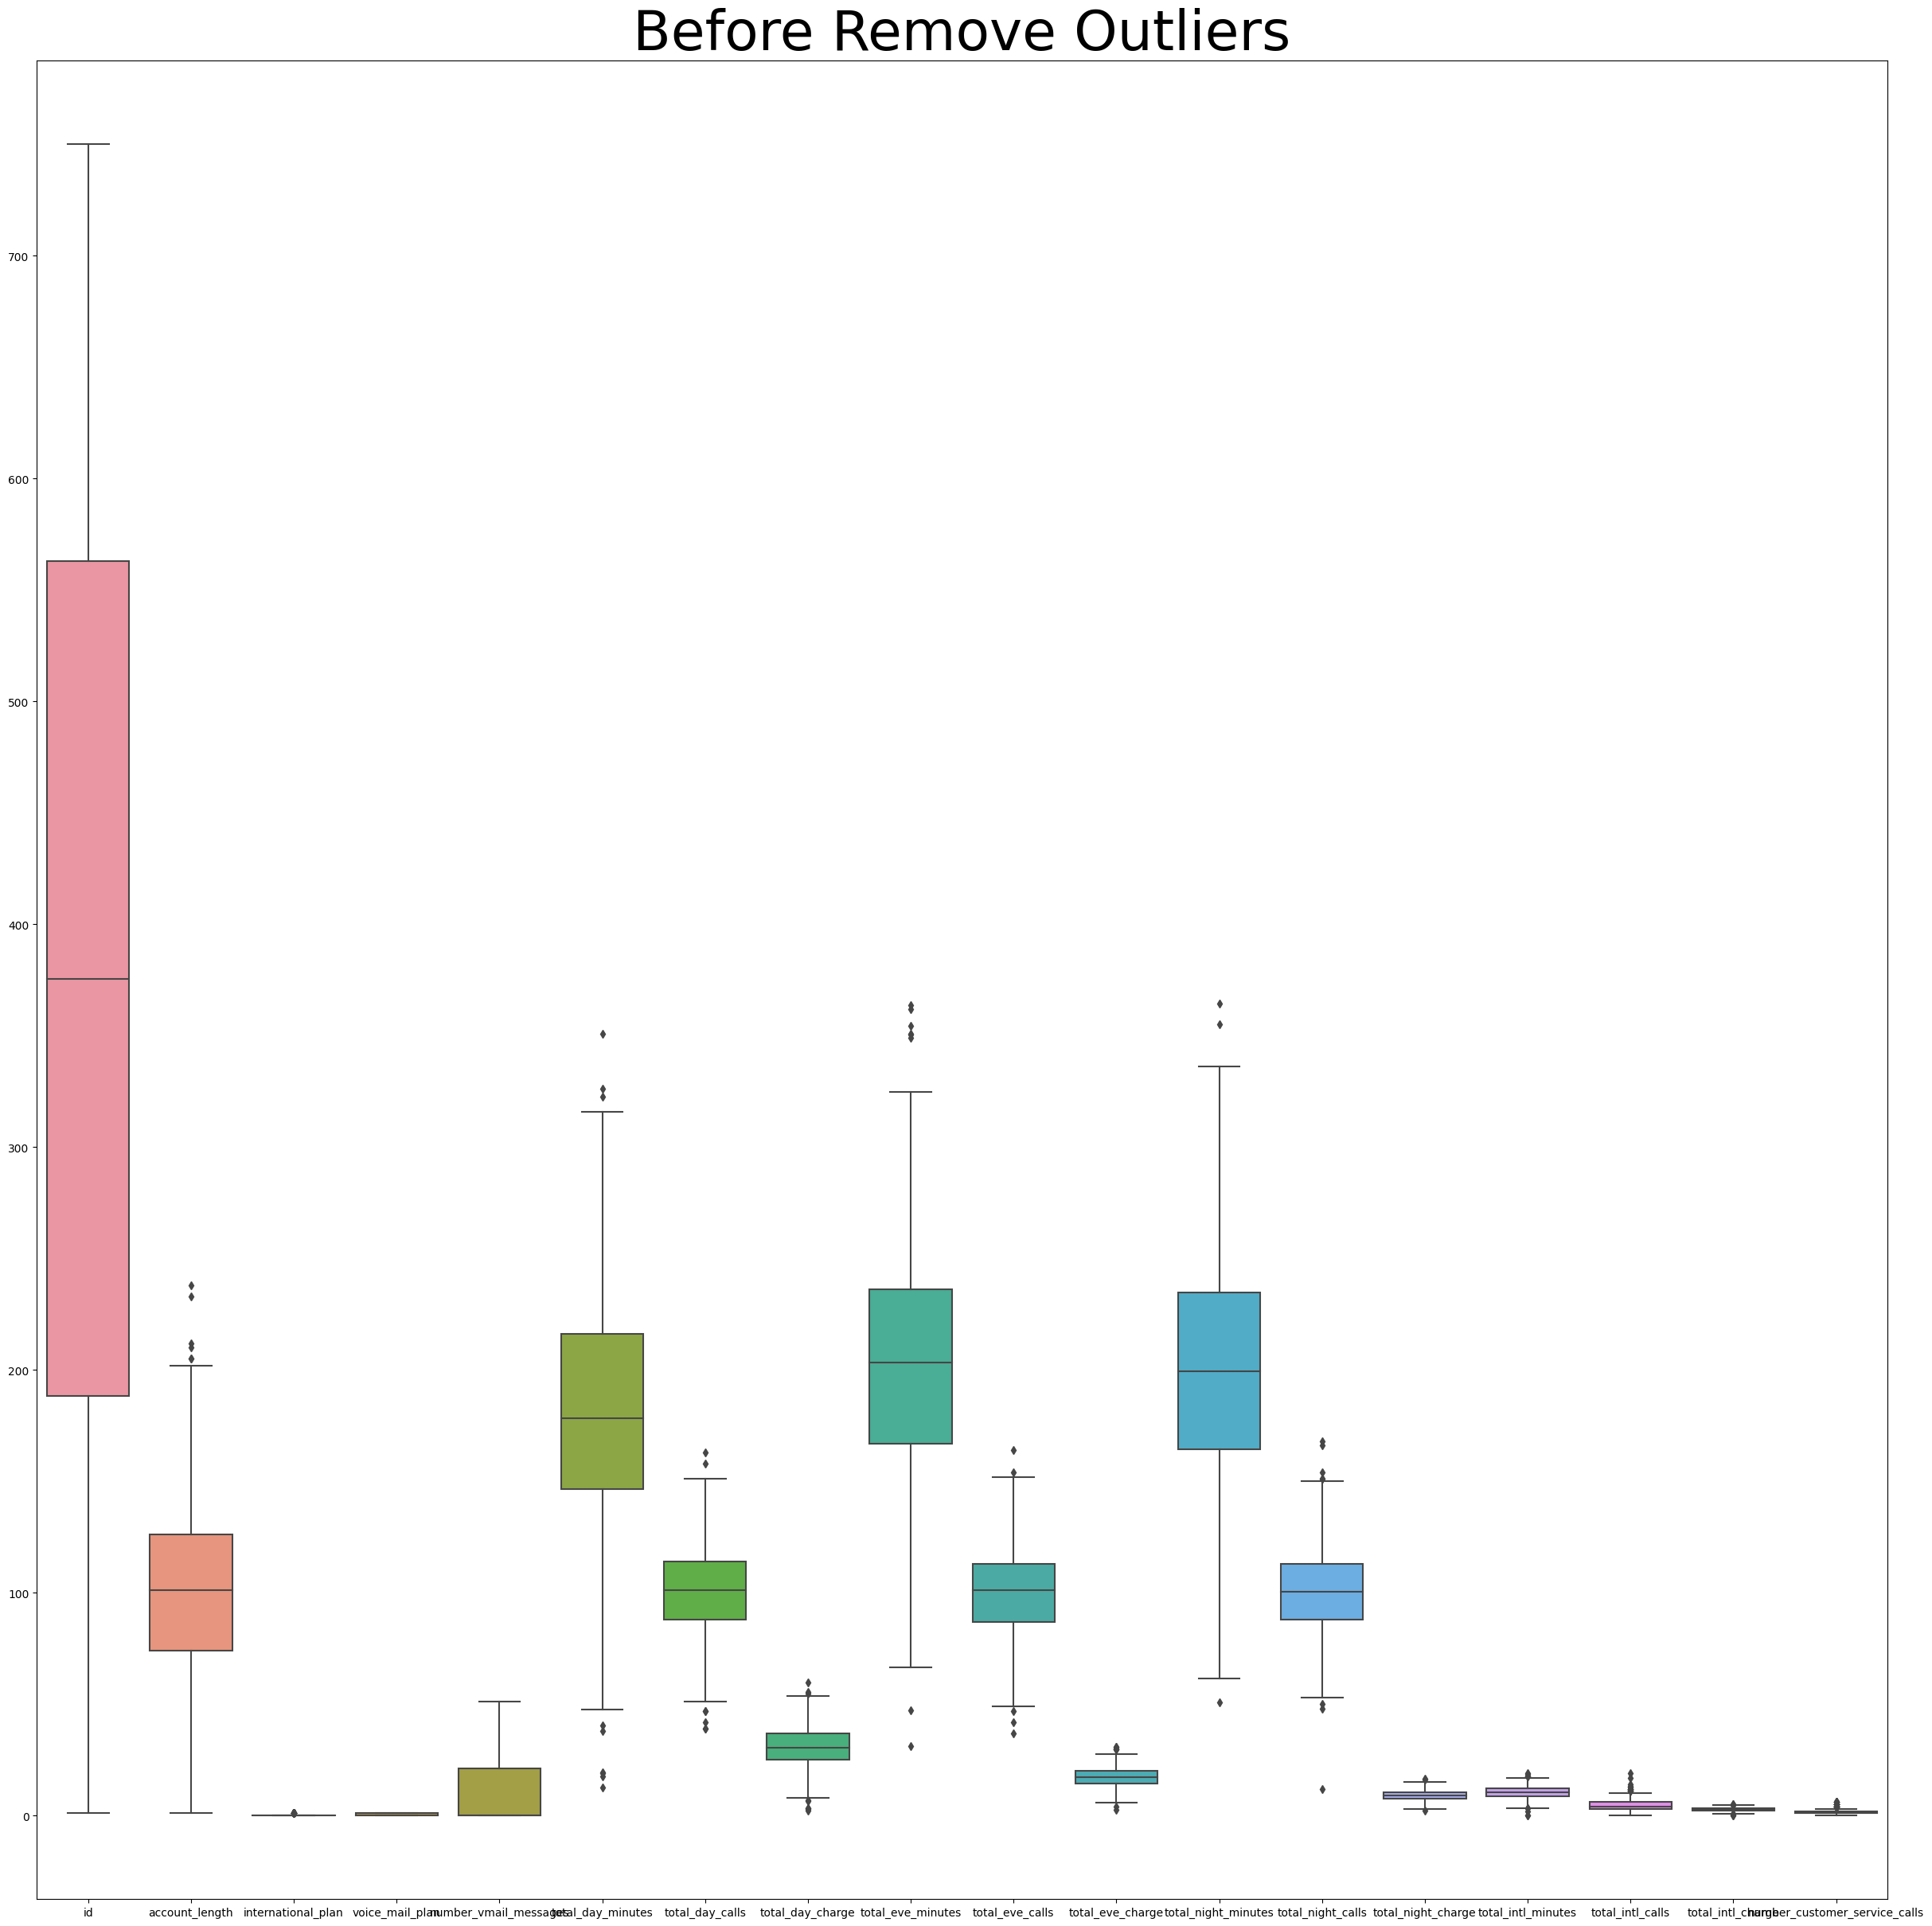

In [85]:
# melihat outliers
fig, ax = plt.subplots(figsize=(30,30))
plt.title('Before Remove Outliers', fontsize=50)
sns.boxplot(data = df_test)

Berdasarkan boxplot diatas, terdapat outliers pada kolom 'total_night_calls'.

Dalam kasus ini, akan dihapus outliers menggunakan teknik **Z-Score**.

In [86]:
# Z-Score
columns = ['total_night_calls']

for i in columns:
    upper_limit = df_test[i].mean() + 3*df_test[i].std()
    lower_limit = df_test[i].mean() - 3*df_test[i].std()

    df_test[i] = np.where(
        df_test[i]>upper_limit,
        upper_limit,
        np.where(
            df_test[i]<lower_limit,
            lower_limit,
            df_test[i]
        )
    )

<AxesSubplot: title={'center': 'After Remove Outliers'}>

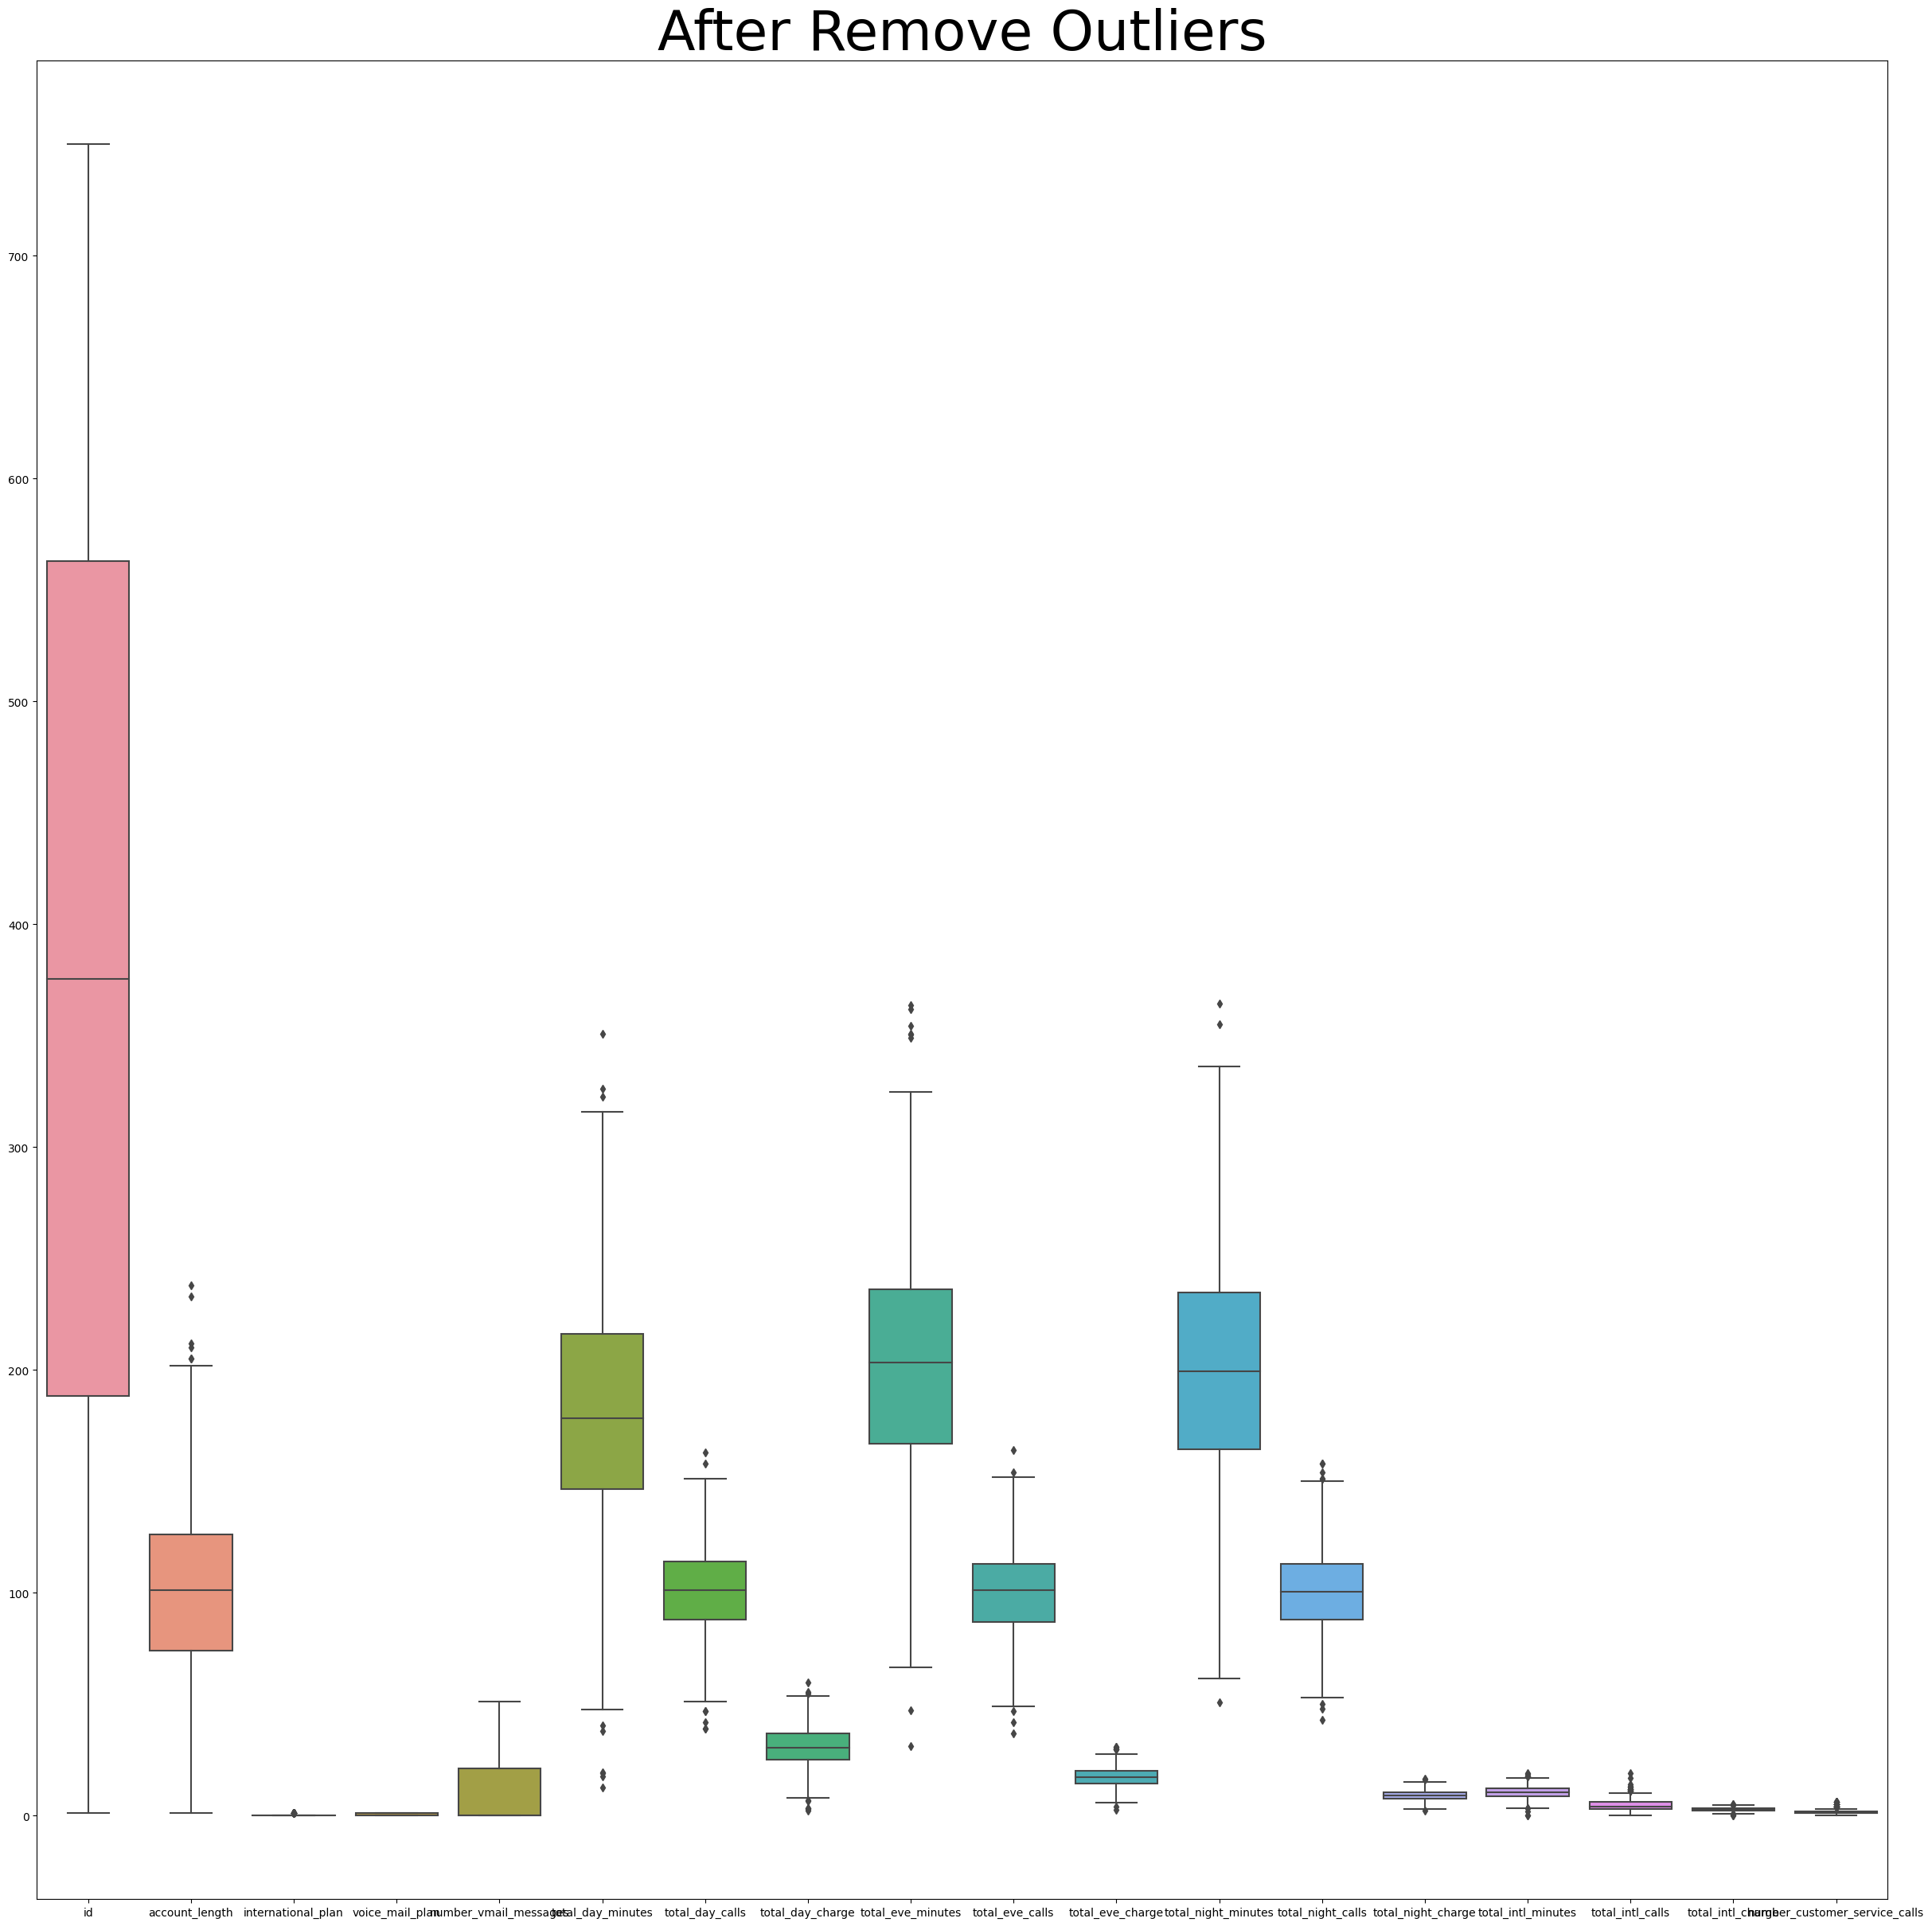

In [87]:
fig, ax = plt.subplots(figsize=(30,30))
plt.title('After Remove Outliers', fontsize=50)
sns.boxplot(data = df_test)

### Data Encoding

Berikut kolom/feature yang akan digunakan dalam predict churn: 

**'total_day_minutes', 'total_day_charge', 'total_eve_minutes',
       'voice_mail_plan', 'total_night_minutes', 'area_code_area_code_408',
       'area_code_area_code_415', 'area_code_area_code_510',
       'number_customer_service_calls'**

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    int64  
 5   voice_mail_plan                750 non-null    int64  
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [89]:
df_pred = df_test.drop(['id', 'state', 'account_length', 'international_plan', 'number_vmail_messages', 
                        'total_day_calls', 'total_eve_calls', 'total_eve_charge', 'total_night_calls', 
                        'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1)

In [90]:
df_pred

,area_code,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_night_minutes,number_customer_service_calls
0,area_code_415,1,265.1,45.07,197.4,244.7,1
1,area_code_510,0,223.4,37.98,220.6,203.9,0
2,area_code_415,0,120.7,20.52,307.2,203.0,4
3,area_code_510,0,190.7,32.42,218.2,129.6,3
4,area_code_415,0,124.3,21.13,277.1,250.7,3
...,...,...,...,...,...,...,...
745,area_code_415,1,119.4,20.30,226.3,202.7,0
746,area_code_408,1,177.2,30.12,270.5,241.8,3
747,area_code_415,0,184.2,31.31,256.8,213.6,3
748,area_code_415,1,140.6,23.90,172.8,212.4,1


In [91]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area_code                      750 non-null    object 
 1   voice_mail_plan                750 non-null    int64  
 2   total_day_minutes              750 non-null    float64
 3   total_day_charge               750 non-null    float64
 4   total_eve_minutes              750 non-null    float64
 5   total_night_minutes            750 non-null    float64
 6   number_customer_service_calls  750 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 41.1+ KB


In [92]:
# melakukan one hot encoder (nominal) pada kolom area_code
df_pred = pd.get_dummies(df_pred)
df_pred

,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_night_minutes,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,1,265.1,45.07,197.4,244.7,1,0,1,0
1,0,223.4,37.98,220.6,203.9,0,0,0,1
2,0,120.7,20.52,307.2,203.0,4,0,1,0
3,0,190.7,32.42,218.2,129.6,3,0,0,1
4,0,124.3,21.13,277.1,250.7,3,0,1,0
...,...,...,...,...,...,...,...,...,...
745,1,119.4,20.30,226.3,202.7,0,0,1,0
746,1,177.2,30.12,270.5,241.8,3,1,0,0
747,0,184.2,31.31,256.8,213.6,3,0,1,0
748,1,140.6,23.90,172.8,212.4,1,0,1,0


### Predict Churn

In [93]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   voice_mail_plan                750 non-null    int64  
 1   total_day_minutes              750 non-null    float64
 2   total_day_charge               750 non-null    float64
 3   total_eve_minutes              750 non-null    float64
 4   total_night_minutes            750 non-null    float64
 5   number_customer_service_calls  750 non-null    int64  
 6   area_code_area_code_408        750 non-null    uint8  
 7   area_code_area_code_415        750 non-null    uint8  
 8   area_code_area_code_510        750 non-null    uint8  
dtypes: float64(4), int64(2), uint8(3)
memory usage: 37.5 KB


In [94]:
# prediksi churn
df_pred['churn'] = etc_grid.predict(df_pred)

In [95]:
df_pred

,voice_mail_plan,total_day_minutes,total_day_charge,total_eve_minutes,total_night_minutes,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,churn
0,1,265.1,45.07,197.4,244.7,1,0,1,0,0
1,0,223.4,37.98,220.6,203.9,0,0,0,1,1
2,0,120.7,20.52,307.2,203.0,4,0,1,0,0
3,0,190.7,32.42,218.2,129.6,3,0,0,1,0
4,0,124.3,21.13,277.1,250.7,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
745,1,119.4,20.30,226.3,202.7,0,0,1,0,0
746,1,177.2,30.12,270.5,241.8,3,1,0,0,0
747,0,184.2,31.31,256.8,213.6,3,0,1,0,0
748,1,140.6,23.90,172.8,212.4,1,0,1,0,0


In [96]:
df_pred['churn'].value_counts()

0    719
1     31
Name: churn, dtype: int64

## Merge Data Awal + Var. Churn

In [97]:
df_final = pd.concat([df_test, df_pred['churn']], axis=1)

In [98]:
df_final.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,0,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118.0,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,1,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99.0,9.14,13.1,6,3.54,4,0
3,4,VT,93,area_code_510,1,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121.0,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115.0,11.28,15.5,5,4.19,3,0


# Kesimpulan

Berdasarkan percobaan hasil menggunakan Data Train dan Data Test, disimpulkan bahwa model ExtraTreesClassifier baik dalam memprediksi customer.
Berikut adalah hasil Score AUC menggunakan Data Train dan Data Test:

-- Data Train

1. **Plain: 93,38%**

2. **Tune: 93,45%**

-- Data Test

**Berdasarkan data test, bahwa jumlah customer yang tidak churn adalah 719 dan yang churn 31**.